## Logistic回归

## logistic回归的一般过程
1. 收集数据：采集任意方法收集数据
2. 准备数据：由于需要进行距离计算，因此要求数据类型为数值型。另外，数据化结构格式最佳
3. 分析数据：采用任意方法对数据进行分析
4. 训练算法：大部分时间将用于训练，训练的目的是为了找到最佳的分类回归系数
5. 测试算法：一旦训练步骤完成，分类将会很快
6. 使用算法：首先，我们需要输入一些数据，并将其转换成对应的结构化数值；
   接着，基于训练好的回归系数就可以对这些数值进行简单的回归计算，判定它们属于哪个类别；在这之后，我们就可以在输出的列别上做一些其他分析工作


## 训练算法：使用梯度上升找到最佳参数

In [3]:
## Logistic回归梯度上升优化算法
def loadDataSet():
    dataMat = []
    labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0,float(lineArr[0]),float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

def sigmoid(inX):
    return 1.0/(1+exp(-inX))

# 梯度上升函数
def gradAscent(dataMatIn,classLabels):
    dataMatrix = mat(dataMatIn)
    labelMat = mat(classLabels).transpose()
    m,n = shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = ones((n,1))
    # maxCycles是迭代次数
    for k in range(maxCycles):
        # 用极大似然估计法求回归系数
        # 推导公式 https://blog.csdn.net/tianse12/article/details/70183348/
        h = sigmoid(dataMatrix * weights)
        error = labelMat - h
        weights = weights + alpha * dataMatrix.transpose() * error
    # weight 即为回归系数
    #print(error)
    return weights

In [4]:
from numpy import *
dataArr,labelMat = loadDataSet()
len(dataArr)
dataMatrix = mat(dataArr)
dataMatrix
gradAscent(dataArr,labelMat)

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

In [84]:
mat(labelMat).transpose()

matrix([[0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],

## 分析数据：画出决策边界

In [11]:
## 画出数据集和Logistic回归最佳你和直线的函数
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat,labelMat =loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0]
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if labelMat[i] == 1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1,ycord1,s=30,c='red',marker='s')
    ax.scatter(xcord2,ycord2,s=30,c='green')
    x = arange(-3.0,3.0,0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x,y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

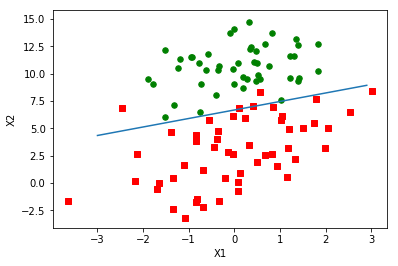

In [12]:
from numpy import * 
weights = gradAscent(dataArr,labelMat)
## getA()函数将numpy矩阵转化为数组
## 若没有getA(),y和x的维数不一样，所以ax.plot(x, y)会出错
plotBestFit(weights.getA())
# labelMat[0]

## 训练算法：随机梯度上升
梯度上升算法在每次更新回归系数时，都需要遍历整个数据集，改进方法是一次仅用一个样本点来更新回归系数，该方法称为随机梯度上升算法

In [92]:
## 随机梯度上升算法
def stocGradAscent0(dataMatrix,classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i] * weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

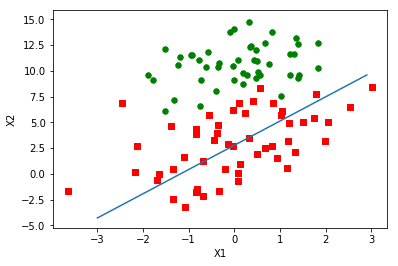

In [94]:
weights = stocGradAscent0(array(dataArr),labelMat)
plotBestFit(weights)

In [8]:
## 改进的随机梯度上升算法
def stocGradAscent1(dataMatrix,classLabels,numIter=150):
    m,n = shape(dataMatrix)
    weights = ones(n)
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            # alpha在每次迭代的时候都会调整，缓解数据的高频波动
            alpha = 4 / (1.0+j+i) + 0.01
            # 通过随机选取样本来更新回归系数，这样可以减少周期性的波动
            randIndex = int(random.uniform(0,len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del (dataIndex[randIndex])
    return weights

[14.41197597  1.07231446 -1.94599336]


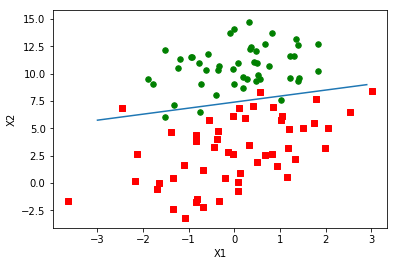

In [40]:
weights = stocGradAscent1(array(dataArr),labelMat)
print(weights)
plotBestFit(weights)

## 示例：从疝气病预测病马的死亡率
1. 收集数据：给定数据文件
2. 准备数据：用python解析文本文件并填充缺失值
3. 分析数据：可视化并观察数据
4. 训练算法：使用优化算法，找到最佳的系数
5. 测试算法：为了量化回归的效果，需要观察错误率，根据错误率决定是否回退到训练阶段
            通过改变迭代的次数和布长等参数来得到更好的回归系数
6. 使用算法：

## 准备数据：处理数据中的缺失值
处理数据确实的常见做法：  
1. 使用可用特征的均值来填补缺失值
2. 使用特殊值来填补缺失值，如-1
3. 忽略有缺失值的样本
4. 使用相似样本的均值添补缺失值
5. 使用另外的机器学习算法预测缺失值


## 对数据集进行预处理
1. 所有的缺失值必须用一个实数值来替换，因为Numpy数据类型不允许包含缺失值  
   这里选择实数0来替换所有缺失值，weights = weights + alpha * error * dataMatrix[randIndex]  
   如果dataMatrix的某特征对应值为0，那么该特征的系数将不做更新，即weigths = weights  
   另外sigmoid(0) = 0.5,即它对结果的预测不具有任何倾向性  
2. 预处理中，如果测试数据集中发现了一条数据的类别标签已经缺失，就把该数据丢弃。  

## 测试算法：用Logistic回归进行分类

In [38]:
## Logistic回归进行分类
def classifyVector(inX,weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5:
        return 1
    else:
        return 0
    
def colicTest():
    frTrain = open('horseColicTraining.txt')
    frTest = open('horseColicTest.txt')
    trainingSet = []
    trainingLabels = []
    # 构造训练集
    for line in frTrain.readlines():
        currLine = line.strip().split()
        # print(currLine)
        # print(len(currLine)) 22
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent1(array(trainingSet),trainingLabels,500)
    errorCount = 0
    numTestVec = 0
    # 构造测试集
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split()
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(array(lineArr),trainWeights)) != int(float(currLine[21])):
            errorCount += 1
    errorRate = errorCount/numTestVec
    print('the error rate of this test is: %f' % errorRate)
    return errorRate

def multiTest():
    numTests = 10
    errorSum = 0
    for k in range(numTests):
        errorSum += colicTest()
    print("after %d iterations the average error rate is: %f" % (numTests,errorSum/float(numTests)))
        

In [39]:
multiTest()

/Users/kokenhei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


the error rate of this test is: 0.417910
the error rate of this test is: 0.313433
the error rate of this test is: 0.298507
the error rate of this test is: 0.402985
the error rate of this test is: 0.402985
the error rate of this test is: 0.268657
the error rate of this test is: 0.283582
the error rate of this test is: 0.477612
the error rate of this test is: 0.417910
the error rate of this test is: 0.343284
after 10 iterations the average error rate is: 0.362687


## cookie: numpy中的广播（broadcast）
只有当数组的形状相同或者可兼容的（compatible），数组间逐个元素（element-wise）的操作才是有效的。  
一旦Numpy确定两者的形状是可兼容的，最终结果的形状就成了每个维度上取两者之间最大的形状尺寸。

如果两个数组的后缘维度(从末尾开始算起的维度)的轴长度相符或其中一方的长度为1，则认为它们是广播兼容的。广播会在缺失维度和(或)轴长度为1的维度上进行。

## cookie: getA()函数:将numpy矩阵转化为数组
getA()函数与mat()函数的功能相反

In [85]:
weights = gradAscent(dataArr,labelMat)
# 将numpy矩阵转换为数组
s = weights.getA()
x = arange(-3.0,3.0,0.1)
y = (-weights[0]-weights[1]*x)/weights[2]
y1 = (-s[0]-s[1]*x)/s[2]

In [86]:
len(y)

1

In [87]:
len(y1)

60